In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('aluguel.csv',dtype = str)
df = df.drop(['Unnamed: 0'],axis=1)

In [3]:
df.head(10)

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 7.000 /Mês,2 Quartos,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5 Banheiros,3 Vagas,276 m²,NaN,NaN
1,R$ 1.650 /Mês,2 Quartos,Rua Professor Demóstenes Batista Figueira Marq...,1 Banheiro,1 Vaga,60 m²,NaN,NaN
2,R$ 2.400 /Mês,1 Quarto,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1 Banheiro,1 Vaga,45 m²,NaN,NaN
3,R$ 1.900 /Mês,2 Quartos,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1 Banheiro,1 Vaga,42 m²,NaN,NaN
4,R$ 1.900 /Mês,2 Quartos,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3 Banheiros,1 Vaga,84 m²,NaN,NaN
5,R$ 1.900 /Mês,1 Quarto,"Rua Adolfo Gordo, 52 - Campos Elíseos, São Pau...",1 Banheiro,1 Vaga,37 m²,NaN,NaN
6,R$ 3.400 /Mês,2 Quartos,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2 Banheiros,1 Vaga,130 m²,NaN,NaN
7,R$ 3.400 /Mês,2 Quartos,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2 Banheiros,2 Vagas,88 m²,NaN,NaN
8,R$ 4.200 /Mês,2 Quartos,"Rua Helena, 52 - Vila Olímpia, São Paulo - SP",2 Banheiros,1 Vaga,60 m²,NaN,NaN
9,R$ 2.500 /Mês,1 Quarto,"Avenida Vereador José Diniz, 3100 - Santo Amar...",1 Banheiro,1 Vaga,35 m²,NaN,NaN


In [4]:
df['bairro'] = df.endereco.str.split('\s-').str[1]
df['rua'] = df.endereco.str.split('\s-').str[0]
df['bairro'] = df.bairro.str.split(',').str[0]

df.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 7.000 /Mês,2 Quartos,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5 Banheiros,3 Vagas,276 m²,Campo Belo,"Rua Volta Redonda, 757"
1,R$ 1.650 /Mês,2 Quartos,Rua Professor Demóstenes Batista Figueira Marq...,1 Banheiro,1 Vaga,60 m²,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,R$ 2.400 /Mês,1 Quarto,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1 Banheiro,1 Vaga,45 m²,Cerqueira César,"Rua Cristiano Viana, 463"
3,R$ 1.900 /Mês,2 Quartos,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1 Banheiro,1 Vaga,42 m²,Bom Retiro,"Rua Afonso Pena, 560"
4,R$ 1.900 /Mês,2 Quartos,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3 Banheiros,1 Vaga,84 m²,Vila Mascote,"Rua Araquém, 19"


In [5]:
all_columns = list(df)
df[all_columns] = df[all_columns].astype(str)

In [6]:
df['area'] = df['area'].str.extract('(.*) m²')

In [7]:
df['vaga'] = df['vaga'].str.extract('(.*) Vaga')

In [8]:
df['banheiro'] = df['banheiro'].str.extract('(.*) Banheiro')
df['quartos'] = df['quartos'].str.extract('(.*) Quarto')
df.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,R$ 7.000 /Mês,2,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5,3,276,Campo Belo,"Rua Volta Redonda, 757"
1,R$ 1.650 /Mês,2,Rua Professor Demóstenes Batista Figueira Marq...,1,1,60,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,R$ 2.400 /Mês,1,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1,1,45,Cerqueira César,"Rua Cristiano Viana, 463"
3,R$ 1.900 /Mês,2,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1,1,42,Bom Retiro,"Rua Afonso Pena, 560"
4,R$ 1.900 /Mês,2,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3,1,84,Vila Mascote,"Rua Araquém, 19"


In [9]:
df['aluguel'] = df['aluguel'].str.extract('R\$ (.*) /Mês')
df['aluguel'] = df['aluguel'].replace('\.', '', regex=True)
df.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua
0,7000,2,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5,3,276,Campo Belo,"Rua Volta Redonda, 757"
1,1650,2,Rua Professor Demóstenes Batista Figueira Marq...,1,1,60,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,2400,1,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1,1,45,Cerqueira César,"Rua Cristiano Viana, 463"
3,1900,2,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1,1,42,Bom Retiro,"Rua Afonso Pena, 560"
4,1900,2,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3,1,84,Vila Mascote,"Rua Araquém, 19"


In [10]:
df = df.drop_duplicates(subset=['endereco','aluguel'], keep='first', inplace=False)

In [11]:
df.shape

(1098, 8)

In [12]:
df.to_csv('aluguel_dadoslimpos.csv')

In [14]:
nova = df.columns.drop(['endereco','bairro','rua'])

In [15]:
df[nova] = df[nova].apply(pd.to_numeric, errors='coerce')

In [16]:
df.describe()

,aluguel,quartos,banheiro,vaga,area
count,1098.000000,1068.000000,1091.000000,891.000000,1098.000000
mean,7412.638434,2.441011,2.597617,2.815937,191.764117
std,11628.341855,1.336280,1.858369,3.373694,243.575785
min,500.000000,1.000000,1.000000,1.000000,0.000000
25%,1864.000000,1.000000,1.000000,1.000000,45.000000
50%,3275.000000,2.000000,2.000000,2.000000,94.500000
75%,8000.000000,3.000000,4.000000,4.000000,250.000000
max,110000.000000,11.000000,11.000000,40.000000,2000.000000


In [17]:
df.isnull().sum()

aluguel       0
quartos      30
endereco      0
banheiro      7
vaga        207
area          0
bairro        0
rua           0
dtype: int64

In [18]:
df = df.fillna(0)
df.isnull().sum()

aluguel     0
quartos     0
endereco    0
banheiro    0
vaga        0
area        0
bairro      0
rua         0
dtype: int64

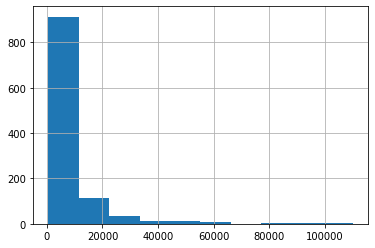

In [19]:
df.aluguel.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


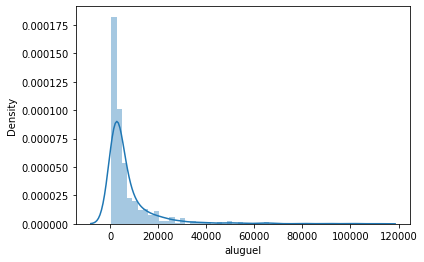

In [20]:
import seaborn as sns
sns.distplot(df['aluguel']);

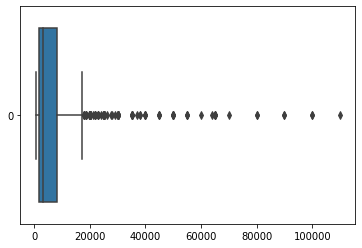

In [21]:
sns.boxplot(data = df['aluguel'], orient='horizontal')

Text(0, 0.5, 'Aluguel')

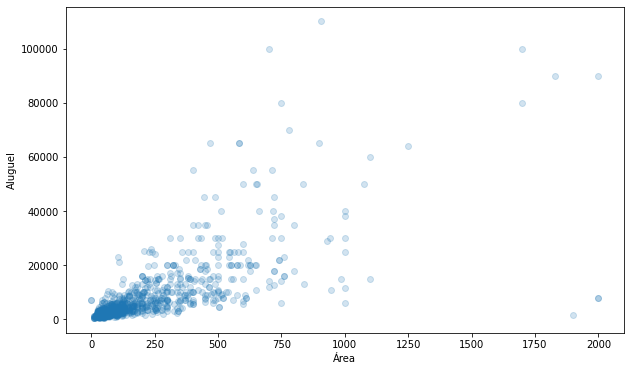

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['aluguel'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Área')
plt.ylabel('Aluguel')

In [23]:
df.corr()

,aluguel,quartos,banheiro,vaga,area
aluguel,1.000000,0.489941,0.613367,0.495619,0.724069
quartos,0.489941,1.000000,0.732924,0.455138,0.595079
banheiro,0.613367,0.732924,1.000000,0.529569,0.686052
vaga,0.495619,0.455138,0.529569,1.000000,0.564135
area,0.724069,0.595079,0.686052,0.564135,1.000000


In [26]:
centro = ['Centro','Bela Vista','Bom Retiro','Cambuci','Consolação',
          'Higienópolis','Liberdade','República','Santa Cecília','Sé','Paraíso','Santa Efigênia',
         'Aclimação','Campos Eliseos','Campos Elíseos','Cerqueira César']
norte = ['Norte','Anhanguera','Brasilândia','Casa Verde','Cachoeirinha','Freguesia do Ó','Jaçanã','Jaraguá',
    'Limão','Mandaqui','Perus','Pirituba','Santana','São Domingos','Tremembé','Tucuruvi','Vila Maria',
    'Vila Medeiros','Vila Guilherme','Jardim Peri Peri']
sul = ['Sul','Campo Belo','Campo Limpo','Capão Redondo','Cidade Ademar','Cidade Dutra','Cursino','Grajaú',
    'Itaim Bibi','Ipiranga','Jabaquara' ,'Jardim Ângela' ,'Jardim São Luís','Marsilac', 'Moema',
    'Moema Pássaros','Moema Índios','Morumbi','Parelheiros','Pedreira','Sacomã' ,
    'Santo Amaro','Socorro','Saúde','Vila Andrade','Vila Mariana','Vila Olímpia','Vila Mascote','Brooklin',
       'Brooklin Novo','Brooklin Paulista','Cidade das Monções','Cidade Monções','Jardins','Vila Nova Conceição']
leste = ['Leste','Água Rasa','Aricanduva','Artur Alvim','Belém','Brás','Cangaíba','Carrão','Cidade Líder',
    'Cidade Tiradentes','Ermelino Matarazzo','Guaianases','Itaim Paulista','Itaquera',
    'Jardim Helena','José Bonifácio','Lajeado','Mooca','Pari','Parque do Carmo','Penha',
    'Ponte Rasa','São Lucas','São Mateus','São Miguel','São Rafael','Sapopemba','Tatuapé',
    'Vila Curuçá','Vila Formosa','Vila Jacuí','Vila Matilde','Vila Prudente','Mooca','Tatuapé','Carandiru','Mirandópolis']
oeste = ['Oeste','Alto de Pinheiros','Barra Funda','Butantã','Jaguará','Jardim Paulista','Jardim Paulistano',
    'Jardim Europa','Jardim América','Lapa','Morumbi','Perdizes','Pinheiros','Raposo Tavares','Rio Pequeno'
    'Vila Leopoldina','Vila Madalena','Vila Sônia','Sumarezinho','Sumaré','Boaçava','Jardim das Vertentes',
        'Rio Pequeno','Vila Leopoldina','Panamby','Jardim Monte Kemel','Pompeia']
nenhuma = ['nenhuma']

In [27]:
bairros = nenhuma + sul + oeste + norte + sul + centro + leste

In [28]:
def checarN_zona(df,lista):
    df = df[~df.endereco.str.contains('|'.join(bairros))]
    df['zona'] = str(lista[0])
    return df

In [30]:
dff = checarN_zona(df,bairros)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
def checar_zona(df,lista):
    df = df[df.endereco.str.contains('|'.join(lista))]
    df['zona'] = str(lista[0])
    return df

In [32]:
df_1 = checar_zona(df,oeste)
df_1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(223, 9)

In [33]:
df2 = checar_zona(df,sul)
df3 = checar_zona(df,leste)
df4 = checar_zona(df,centro)
df5 = checar_zona(df,norte)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df_concat = pd.concat([df_1,df2,df3,df4,df5,df7])

In [36]:
df_concat.shape

(1173, 9)

In [37]:
df_final = df_concat.drop_duplicates(subset=['endereco','aluguel'], keep='last', inplace=False)

In [38]:
df_final.shape

(1098, 9)

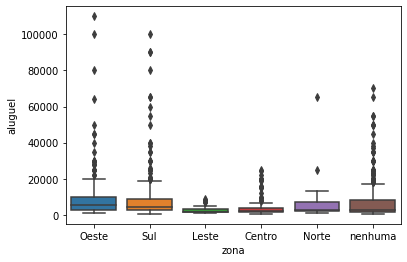

In [39]:
sns.boxplot(x='zona', y='aluguel', data=df_final)